In [2]:
import poker_game as pg
import matplotlib.pyplot as plt
import bot_players as bots
# from scipy.stats import chisquare, shapiro
import numpy as np
# from random import choice 
from importlib import reload
reload(bots)

<module 'bot_players' from 'c:\\Users\\jarom\\OneDrive\\Dokumenty\\Coding\\Python\\projects\\poker\\bot_players.py'>

In [46]:
start_money = 50
game = pg.PokerGame(blind_increment = 2)
players = [bots.EVBot(game, p_raise=0.7, p_call=0.3),
            bots.CheaterBot(game)]
game.initialise_players(players, shuffle=False)
game.run_hands(n=10000)
history = game.history
for key, value in history.items():
    print(key.name, np.average(value) - start_money)

Evicka -0.4744525547445235
Podvodnik 0.4744525547445235


In [49]:
player_set = [bots.CallMachineBot, bots.HazardBot, bots.CheaterBot, bots.EVBot]
vysledky = np.zeros((len(player_set), len(player_set)))
for i, p1 in enumerate(player_set):
    for j, p2 in enumerate(player_set[i+1:]):
        game = pg.PokerGame(blind_increment = 2)
        players = [p1(game), p2(game)]
        game.initialise_players(players, shuffle=False)
        game.run_hands(n=10000)
        history = game.history
        vysledky[i, j+i+1] = np.average(history[players[0]]) - start_money
        vysledky[j+i+1, i] = np.average(history[players[1]]) - start_money

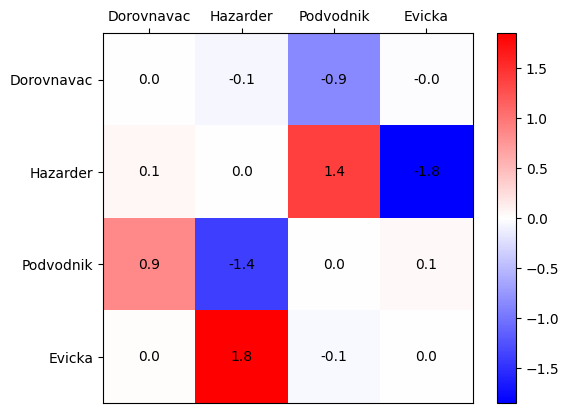

In [50]:
fig, ax = plt.subplots()
im = ax.imshow(vysledky, cmap='bwr', interpolation='nearest')
fig = fig.colorbar(im, ax=ax)
for i in range(vysledky.shape[0]):
    for j in range(vysledky.shape[1]):
        c = round(vysledky[j,i], 1)
        ax.text(i, j, str(c), va='center', ha='center')

bot_names = [p(game).name for p in player_set]
ax.set_xticks(np.arange(len(bot_names)))
ax.set_xticklabels(bot_names)
ax.set_yticks(np.arange(len(bot_names)))
ax.set_yticklabels(bot_names)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


In [ ]:
reload(bots)
def jak_dobra_je_evicka(p_raise=0.6, p_call=0.4, n_sim=10):
    # player_set = [bots.CheaterBot]
    player_set = [bots.CallMachineBot, bots.HazardBot, bots.CheaterBot]
    vysledky = np.zeros(len(player_set))
    for i, p2 in enumerate(player_set):
        game = pg.PokerGame(blind_increment = 2)
        players = [bots.EVBot(game, p_raise=p_raise, p_call=p_call, n_sim=n_sim), p2(game)]
        game.initialise_players(players, shuffle=False)
        game.run_hands(n=1000)
        history = game.history
        vysledky[i] = np.average(history[players[0]]) - start_money
    return vysledky

In [69]:
sila = np.zeros((5,5))
for i, p1 in enumerate(np.arange(0.55, 0.8, 0.05)):
    for j, p2 in enumerate(np.arange(0.25, 0.5, 0.05)):
        fitness = jak_dobra_je_evicka(p_raise=p1, p_call=p2, n_sim=100)
        print(p1, p2, fitness)
        sila[i, j] = round(np.average(fitness),2) 
print(sila)

0.55 0.25 [ 0.01398601  2.48251748 -7.14985015]
0.55 0.3 [ 0.08391608  2.92907093 -5.73026973]
0.55 0.35 [ 0.05094905  3.10989011 -5.74625375]
0.55 0.39999999999999997 [-0.04695305  3.62237762 -5.6013986 ]
0.55 0.44999999999999996 [ 0.07192807  3.38461538 -5.92907093]
0.6000000000000001 0.25 [ 0.1018981   1.53346653 -3.26773227]
0.6000000000000001 0.3 [ 0.04395604  1.67232767 -3.64235764]
0.6000000000000001 0.35 [-0.07292707  2.09490509 -3.09190809]
0.6000000000000001 0.39999999999999997 [ 0.12587413  1.6033966  -2.94905095]
0.6000000000000001 0.44999999999999996 [-0.11388611  0.85814186 -3.32567433]
0.6500000000000001 0.25 [-0.01598402  1.07092907 -1.7982018 ]
0.6500000000000001 0.3 [ 0.04595405  1.003996   -1.79020979]
0.6500000000000001 0.35 [ 0.02097902  1.46353646 -1.93106893]
0.6500000000000001 0.39999999999999997 [ 0.02197802  0.82017982 -1.68631369]
0.6500000000000001 0.44999999999999996 [-0.11688312  0.31468531 -2.22577423]
0.7000000000000002 0.25 [-0.03496503  0.81218781 -1.2

In [70]:
print(sila)

[[-1.55 -0.91 -0.86 -0.68 -0.82]
 [-0.54 -0.64 -0.36 -0.41 -0.86]
 [-0.25 -0.25 -0.15 -0.28 -0.68]
 [-0.17 -0.22 -0.25 -0.32 -0.07]
 [-0.22 -0.08 -0.21 -0.29 -0.29]]


In [ ]:
p_raise = 0.66
p_call = 0.33

In [79]:
reload(bots)
game = pg.PokerGame(blind_increment = 2)
n_sim = 100
players = [bots.EVBot(game, p_raise=0.66, p_call=0.33, n_sim=n_sim), 
           bots.EVBot(game, p_raise=0.5, p_call=0.33, n_sim=n_sim)]
game.initialise_players(players, shuffle=False)
game.run_hands(n=10000)
history = game.history
prumer = np.average(history[players[0]]) - start_money
print(prumer)

0.3675632436756331


In [80]:
reload(bots)
game = pg.PokerGame(blind_increment = 2)
n_sim = 100
players = [bots.EVBot(game, p_raise=0.66, p_call=0.33, n_sim=n_sim), 
           bots.EVBot(game, p_raise=0.6, p_call=0.33, n_sim=n_sim)]
game.initialise_players(players, shuffle=False)
game.run_hands(n=10000)
history = game.history
prumer = np.average(history[players[0]]) - start_money
print(prumer)

-0.05039496050395087


In [81]:
reload(bots)
game = pg.PokerGame(blind_increment = 2)
n_sim = 100
players = [bots.EVBot(game, p_raise=0.66, p_call=0.33, n_sim=n_sim), 
           bots.EVBot(game, p_raise=0.6, p_call=0.4, n_sim=n_sim)]
game.initialise_players(players, shuffle=False)
game.run_hands(n=10000)
history = game.history
prumer = np.average(history[players[0]]) - start_money
print(prumer)

0.14018598140185645


In [82]:
reload(bots)
game = pg.PokerGame(blind_increment = 2)
n_sim = 100
players = [bots.EVBot(game, p_raise=0.66, p_call=0.33, n_sim=n_sim), 
           bots.EVBot(game, p_raise=0.5, p_call=0.3, n_sim=n_sim)]
game.initialise_players(players, shuffle=False)
game.run_hands(n=10000)
history = game.history
prumer = np.average(history[players[0]]) - start_money
print(prumer)

0.1511848815118455


In [5]:
import fft_bot
reload(fft_bot)
game = pg.PokerGame(blind_increment = 2)
fft_bot.AggressiveFFT(game).print_tree()

if isPair <= 1 then raise
if highestCard >= 9 then raise
else call


In [6]:
fft_bot.PassiveFFT(game).print_tree()

if isPair <= 1 then raise
if lowestCard >= 9 then raise
else call
